In [4]:
import numpy as num
import pandas as pd
from matplotlib import pyplot as plt
import os
import urllib
from urllib import request
import scipy
from scipy import stats as stats
import datetime as dt
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
#url = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/COVID-19%20-%20Johns%20Hopkins%20University.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID19-global-data.csv")
#csv_path = os.path.join(file_path, "JHU-COVID19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df['Date_reported'] = pd.to_datetime(df['Date_reported']).apply(pd.Timestamp.toordinal) #add .apply(pd.Timestamp.toordinal) to switch timestamp to int otherwise omit to keep graph neat
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,737427,AF,Afghanistan,EMRO,0,0,0,0
1,737428,AF,Afghanistan,EMRO,0,0,0,0
2,737429,AF,Afghanistan,EMRO,0,0,0,0
3,737430,AF,Afghanistan,EMRO,0,0,0,0
4,737431,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
181063,738186,ZW,Zimbabwe,AFRO,45,229460,4,5337
181064,738187,ZW,Zimbabwe,AFRO,206,229666,1,5338
181065,738188,ZW,Zimbabwe,AFRO,185,229851,12,5350
181066,738189,ZW,Zimbabwe,AFRO,161,230012,2,5352


In [5]:
gr_df = (df.loc[df['Country'] == 'Greece'])
gr_df.pop('Country_code')
gr_df.pop('Country')
gr_df.pop('WHO_region')
gr_df.pop('Cumulative_cases')
gr_df.pop('Cumulative_deaths')
gr_df

,Date_reported,New_cases,New_deaths
61884,737427,0,0
61885,737428,0,0
61886,737429,0,0
61887,737430,0,0
61888,737431,0,0
...,...,...,...
62643,738186,11112,97
62644,738187,19731,128
62645,738188,24996,108
62646,738189,18825,113


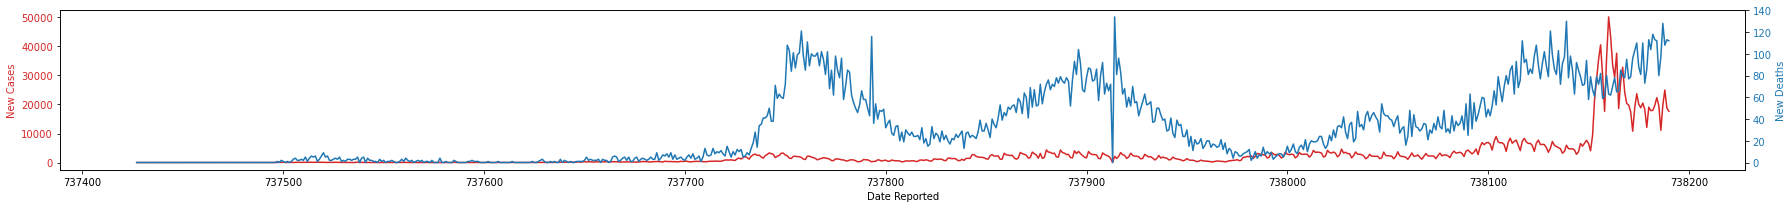

In [6]:
fig = plt.figure(figsize=(25,3))
ax1 = fig.subplots()


color = 'tab:red'
ax1.set_xlabel('Date Reported')
ax1.set_ylabel('New Cases', color=color)
ax1.plot('Date_reported', 'New_cases', color=color,data=gr_df)
#ax1.plot('Year', 'Daily new confirmed cases of COVID-19', color=color,data=gr_df)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Deaths', color=color)
ax2.plot('Date_reported', 'New_deaths', color=color,data=gr_df)
#ax2.plot('Year', 'Daily new confirmed deaths due to COVID-19', color=color,data=gr_df)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()
#fig, ax = plt.subplots(2,1, sharex=True)
#ax[0].plot('Date_reported','New_cases',data=gr_df)
#ax[1].plot('Date_reported','New_deaths',data=gr_df)
#plt.show()

In [7]:
#gr_df start model training

X = gr_df.iloc[ : , 0:2].values
Y = gr_df.iloc[ : , 2].values

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=num.nan, strategy='mean')
imp.fit(X[:, :2])
X[:, :2] = imp.transform(X[:, :2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.25, random_state = 1)

In [10]:
print(X_test)


[[737884   3232]
 [737575      5]
 [738168  24245]
 [737953    791]
 [737827   1195]
 [738157  30009]
 [737716    482]
 [737511     57]
 [737992   3565]
 [737528     33]
 [738135   5087]
 [738091   3639]
 [738016   3493]
 [737857   1142]
 [737517    101]
 [737964    406]
 [737446      0]
 [737621     58]
 [737728   1211]
 [737980   2107]
 [737776   1190]
 [737944   1381]
 [738128   6201]
 [737911   2155]
 [737870   2535]
 [737968    375]
 [737793    262]
 [737581     15]
 [737586      9]
 [738121   6602]
 [737544     32]
 [738086   3541]
 [737915   1387]
 [737998   2070]
 [737629     32]
 [738061   2122]
 [737863   2512]
 [737651    204]
 [738040   1765]
 [737486      2]
 [738123   3823]
 [737538      7]
 [737474      0]
 [737874   3062]
 [738053   1286]
 [737737   2556]
 [737435      0]
 [737901   3789]
 [737660    264]
 [737780    588]
 [737682    207]
 [737821    795]
 [737712    408]
 [738187  19731]
 [737701    460]
 [738062   3287]
 [738159  36246]
 [737876   1496]
 [738059   181